지역 이름을 넣어주세요:  인천광역시


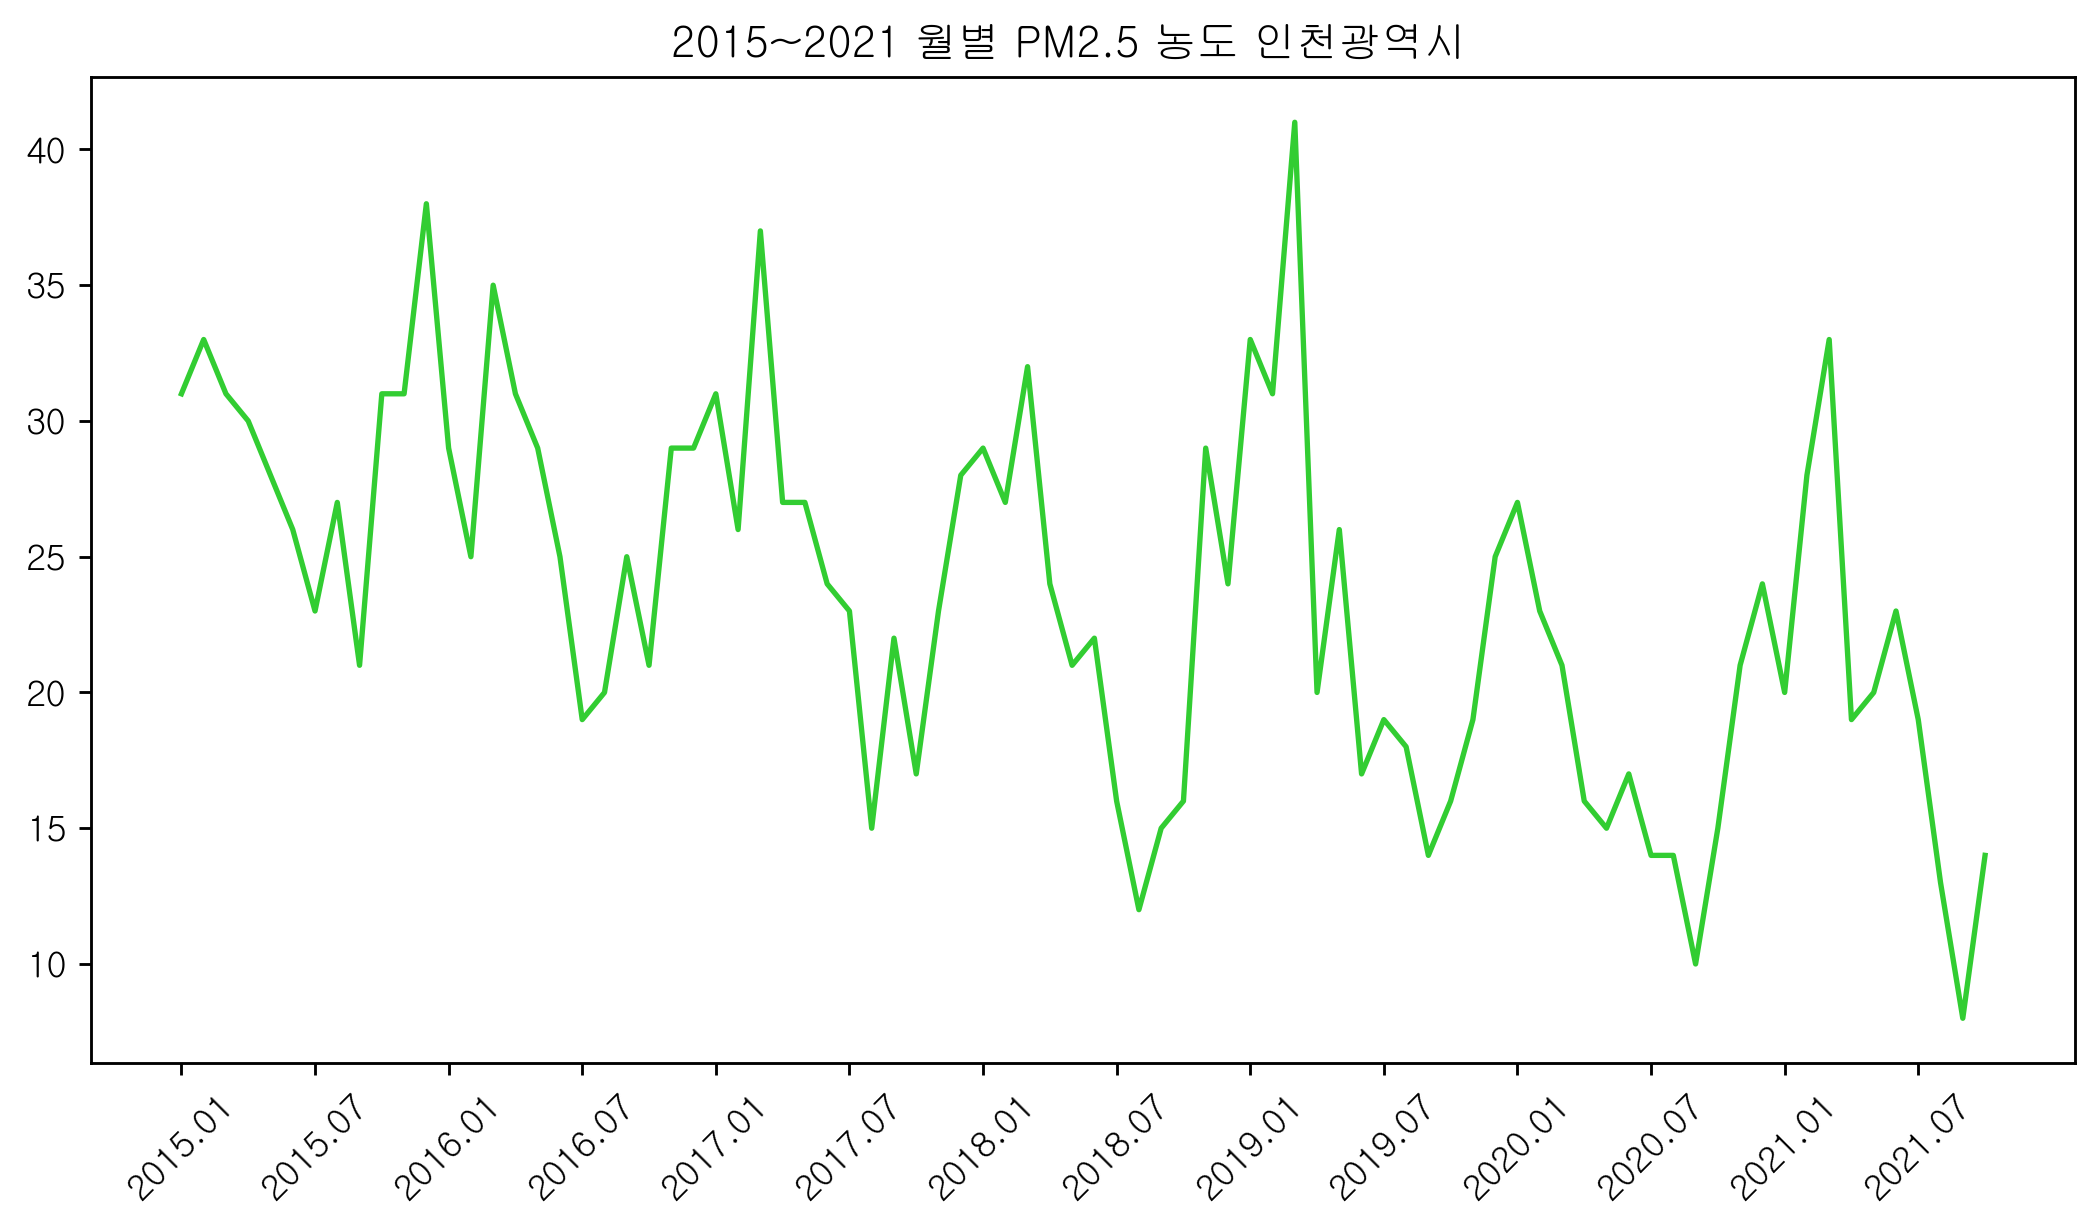

   year location      PM2.5
0  2015    인천광역시  29.166667
1  2016    인천광역시  26.416667
2  2017    인천광역시  25.000000
3  2018    인천광역시  22.250000
4  2019    인천광역시  23.250000
5  2020    인천광역시  18.083333
6  2021    인천광역시  19.700000


In [14]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
#함수 자동화 도전
lo = input("지역 이름을 넣어주세요: ")
def auto(lo):
    #encoding='cp949'를 넣어 한국어가 깨지지 않게 csv 파일 불러오기 
    df = pd.read_csv("m2.5.csv", encoding='cp949')
    #"도평균" 컬럼 삭제
    df = df.drop(['구분(2)'], axis=1) 
    #컬럼 이름 알기 쉽게 변경
    df.columns = ['time','location','PM2.5'] 
    #20xx.1 뒤에 0이 없는 것을 소수점 뒤 2자리까지 표시
    #빈 자리는 0으로 채우는 방식으로 20xx.1을 20xx.10으로 변경
    df['time'] = df['time'].apply(lambda x: '{:.2f}'.format(x))
    #확인
    #df.dtypes
    #특수문자 제거(*)
    df["PM2.5"] = df["PM2.5"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
    df.rename(index=lambda x: "{}".format(x+1))
    #확인
    #print(df.iloc[440])
    #저장
    #df.to_csv("s.csv", mode='w', encoding='cp949')
    #서울시(특정시)만 뽑아내기
    df_s = df[df['location'].str.contains(lo)]
    #pm2.5타입을 object에서 int32로 변경
    df_s = df_s.astype({'PM2.5':'int32'})
    pd.to_numeric(df_s['time'], errors='coerce')
    #인덱스 값 변경(작동안됨)
    #df_s.rename(index=lambda x: "{}".format(x+1))
    #data type 확인
    #print(df_s) #자동화 여기까진 ok
    # 그래프 그리기
    plt.figure(figsize=(10,5), dpi = 256)
    xs = df_s['time'].to_list()
    ys = df_s['PM2.5'].to_list()
    plt.plot(xs, ys, color = "limegreen")
    plt.xticks(ticks=xs, labels=xs, rotation=45)
    #그래프 크기 지정
    #x축 y축 표시될 숫자 편집
    plt.locator_params(axis='x', nbins=len(xs)/6)
    plt.locator_params(axis='y', nbins=len(ys)/6)
    #제목
    plt.title(f"2015~2021 월별 PM2.5 농도 {lo}  ")
    #그래프 출력
    plt.show()    
    #년단위 평규을 구하기 위해 년과 월을 나눔
    sp=df_s["time"].str.split(".",expand=True)
    #컬럼 명을 연과 월로 지정
    sp.columns = ["year", "month"]
    #연월이 합쳐진 컬럼 삭제
    df_s = df_s.drop(['time'], axis=1) 
    #연월이 나뉜 컬럼을 원본과 연결
    df_s = pd.concat([sp, df_s], axis = 1)
    df_y = df_s.groupby(['year', 'location'], as_index=False).mean()
    print(df_y)
    

auto(lo)

